### Assignment 7; PART 2
**Author:** Hala Algrain

**Date:** 4.15.2021

### STEP 8: Re-import libraries and dataframes

In [284]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import os, sys
import glob
import matplotlib.pyplot as plt

In [159]:
df_umbc = pd.read_csv("/content/drive/MyDrive/UMBC_College_Dataset")
df_jhu = pd.read_csv("/content/drive/MyDrive/JHU_College_Dataset")

### STEP 9: Explore UMBC Dataframe

In [160]:
df_umbc.shape

(23, 7)

In [161]:
df_umbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UNITID         23 non-null     int64  
 1   INSTNM         23 non-null     object 
 2   STABBR         23 non-null     object 
 3   REGION         23 non-null     float64
 4   ADM_RATE       18 non-null     float64
 5   TUITIONFEE_IN  19 non-null     float64
 6   Year           23 non-null     int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 1.4+ KB


In [162]:
df_umbc.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
0,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
1,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
2,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
3,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000
4,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001


In [163]:
df_umbc.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
18,163268,University of Maryland-Baltimore County,MD,2.0,0.5683,11264.0,2016
19,163268,University of Maryland-Baltimore County,MD,2.0,0.6021,11518.0,2017
20,163268,University of Maryland-Baltimore County,MD,2.0,0.5794,11778.0,2018
21,163268,University of Maryland-Baltimore County,MD,2.0,0.6081,9467.0,2011
22,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999


In [164]:
df_umbc.sample(10)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
5,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002
9,163268,University of Maryland-Baltimore County,MD,2.0,0.7153,8622.0,2006
22,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
8,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005
21,163268,University of Maryland-Baltimore County,MD,2.0,0.6081,9467.0,2011
10,163268,University of Maryland-Baltimore County,MD,2.0,0.6895,8708.0,2007
17,163268,University of Maryland-Baltimore County,MD,2.0,0.5942,11006.0,2015
16,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014
6,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003
3,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000


In [165]:
df_umbc.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN,Year
count,23.0,23.0,18.000000,19.000000,23.00000
mean,163268.0,2.0,0.640694,9004.842105,2007.00000
std,0.0,0.0,0.052728,1825.795421,6.78233
min,163268.0,2.0,0.568300,5490.000000,1996.00000
25%,163268.0,2.0,0.597600,8270.000000,2001.50000
50%,163268.0,2.0,0.632100,8872.000000,2007.00000
75%,163268.0,2.0,0.689375,10226.000000,2012.50000
max,163268.0,2.0,0.717400,11778.000000,2018.00000


In [166]:
for column in df_umbc:
  missing = df_umbc[column].isnull()
  print(missing)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
Name: UNITID, dtype: bool
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
Name: INSTNM, dtype: bool
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
Name: STABBR, dtype: bool
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     Fals

### Step 10: Plot UMBC's in-state tution overtime from 1996 to 2019 using Bar Chart

In [209]:
# changing year column type
df_umbc["Year"] = pd.to_numeric(df_umbc["Year"])

In [168]:
# remove missing values from tuition
# df_umbc2 = df_umbc.dropna(subset=['TUITIONFEE_IN'])

In [210]:
fig = px.bar(df_umbc, x="Year", y="TUITIONFEE_IN",
             title = "UMBC's In-State Tuition (2000-2018)",
             labels ={"TUITIONFEE_IN": "In-State Tuition"})
fig.show()

### Step 11: Plot UMBC's in-state tution overtime using Line Chart


In [211]:
fig = px.line(df_umbc, x="Year", y="TUITIONFEE_IN",
             title = "UMBC's In-State Tuition (2000-2018)",
             labels ={"TUITIONFEE_IN": "In-State Tuition"},)
fig.show()
# no duplicates for year column
# not sure why there are two lines. 
# google search didn't yield solution

### Step 12:
* Now let's look at the tuition growth rate year over year
* We need to calculate UMBC tuition change percentage each year
* First convert the TUITIONFEE_IN column to a Python List


In [171]:
# sort df by date

#df_umbc2.sort_values(by="Year")
#df_umbc2.reindex

<bound method DataFrame.reindex of     UNITID                                   INSTNM  ... TUITIONFEE_IN  Year
3   163268  University of Maryland-Baltimore County  ...        5490.0  2000
4   163268  University of Maryland-Baltimore County  ...        5910.0  2001
5   163268  University of Maryland-Baltimore County  ...        6362.0  2002
6   163268  University of Maryland-Baltimore County  ...        7388.0  2003
7   163268  University of Maryland-Baltimore County  ...        8020.0  2004
8   163268  University of Maryland-Baltimore County  ...        8520.0  2005
9   163268  University of Maryland-Baltimore County  ...        8622.0  2006
10  163268  University of Maryland-Baltimore County  ...        8708.0  2007
11  163268  University of Maryland-Baltimore County  ...        8780.0  2008
12  163268  University of Maryland-Baltimore County  ...        8872.0  2009
13  163268  University of Maryland-Baltimore County  ...        9171.0  2010
14  163268  University of Maryland-Baltim

In [212]:
umbc_tuit = df_umbc["TUITIONFEE_IN"].tolist()

### Step 13: Loop through the list and calculate the % change each year over the prior year

In [213]:
umbc_tuit_change = [] 
for i in umbc_tuit:
  tuit_change = (i - (i-1)) / (i-1) * 100
  umbc_tuit_change.append(tuit_change)

In [214]:
umbc_tuit_change

[nan,
 nan,
 nan,
 0.018218254691200583,
 0.016923337282112032,
 0.015720798616569723,
 0.013537295248409369,
 0.012470382840753212,
 0.011738466956215518,
 0.011599582415033059,
 0.011485012059262662,
 0.011390818999886091,
 0.011272686281140797,
 0.010905125408942203,
 0.010242753252074157,
 0.009933445912387007,
 0.009631127805065974,
 0.009086778736937756,
 0.008878629139660837,
 0.008682816705739341,
 0.008491126772522714,
 0.010564124234100993,
 nan]

### Step 14: Use list comprehension to round up the percentage to two decimal points

In [215]:
umbc_tuit_change2 = [round(i,2) for i in umbc_tuit_change]
umbc_tuit_change2

[nan,
 nan,
 nan,
 0.02,
 0.02,
 0.02,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 nan]

### Step 13: Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")

In [176]:
#df_umbc2.reset_index(drop=True, inplace=True)
#df_umbc2

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
0,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000
1,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001
2,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002
3,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003
4,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004
5,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005
6,163268,University of Maryland-Baltimore County,MD,2.0,0.7153,8622.0,2006
7,163268,University of Maryland-Baltimore County,MD,2.0,0.6895,8708.0,2007
8,163268,University of Maryland-Baltimore County,MD,2.0,0.7174,8780.0,2008
9,163268,University of Maryland-Baltimore County,MD,2.0,0.6890,8872.0,2009


In [216]:
pd.options.mode.chained_assignment = None  # default='warn'
df_umbc["PCT_CHANGE"] = umbc_tuit_change2

In [217]:
df_umbc

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year,PCT_CHANGE
0,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996,NaN
1,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997,NaN
2,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998,NaN
3,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000,0.02
4,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001,0.02
5,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002,0.02
6,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003,0.01
7,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004,0.01
8,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005,0.01
9,163268,University of Maryland-Baltimore County,MD,2.0,0.7153,8622.0,2006,0.01


### Step 15: we can make the plot tuition growth rate year over year - bar first, then line chart

In [179]:
fig = px.bar(df_umbc2, x="Year", y="PCT_CHANGE",
             title = "UMBC's Percent Change In-State Tuition (2000-2018)",
             labels ={"PCT_CHANGE": "Percent Change"})
fig.show()

In [180]:
fig = px.line(df_umbc2, x="Year", y="PCT_CHANGE",
             title = "UMBC's Percent Change In-State Tuition (2000-2018)",
             labels ={"PCT_CHANGE": "Percent Change"})
fig.show()

### Step 16: Create a function that takes a list of tuitions and return a list of percentage changes year over year


In [201]:
def percent_change(tuit):
  """Calculates percentage change in list of tuition tuit"""
  per_change = []
  per_change2 = []
  tuit_chang = []
  for i in tuit:
    per_change = (i - (i-1)) / (i-1) * 100
    per_change2 = round(per_change,3)
    tuit_chang.append(per_change2)
  return tuit_chang


### Step 17: Plot JHU's in-state tuition overtime from 1996 to 2019.

In [182]:
df_jhu

fig = px.bar(df_jhu, x="Year", y="TUITIONFEE_IN",
             title = "JHU's In-State Tuition (2000-2018)",
             labels ={"TUITIONFEE_IN": "In-State Tuition"})

fig.add_trace(px.line(df_jhu,x="Year", y="TUITIONFEE_IN").data[0])
fig.show()

### Step 18: calculate the JHU tuition percentge growth using the function defined earlier

In [183]:
tuit_jhu = df_jhu["TUITIONFEE_IN"]

In [202]:
percent_change(tuit_jhu)

[nan,
 nan,
 nan,
 0.004,
 0.004,
 0.004,
 0.003,
 0.003,
 0.003,
 0.003,
 0.003,
 0.003,
 0.003,
 0.002,
 0.002,
 0.002,
 0.002,
 0.002,
 0.002,
 0.002,
 0.002,
 0.002,
 nan]

### Step 19: Add the list of percentage changes to the dataframe as a new column ("PCT_CHANGE")

In [ ]:
jhu_tuit_change = percent_change(tuit_jhu)

In [206]:
df_jhu["PCT_CHANGE"] = jhu_tuit_change

In [207]:
df_jhu

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year,PCT_CHANGE
0,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996,NaN
1,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997,NaN
2,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998,NaN
3,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000,0.004
4,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0,2001,0.004
5,162928,Johns Hopkins University,MD,2.0,0.3506,27390.0,2002,0.004
6,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0,2003,0.003
7,162928,Johns Hopkins University,MD,2.0,0.3071,30140.0,2004,0.003
8,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005,0.003
9,162928,Johns Hopkins University,MD,2.0,0.2792,33900.0,2006,0.003


### Step 20: Make a bar plot of the JHU percentage changes tuitions over time

In [208]:
fig = px.bar(df_jhu, x="Year", y="PCT_CHANGE",
             title = "JHU's Percent Change In-State Tuition",
             labels ={"PCT_CHANGE": "Percent Change"})
fig.show()

### Step 21:
In order to plot both UMBC and JHU tuition change over time in the same plot, we need to combine the two datasets using the common key of YEAR:
* First make a umbc2 dataframe with only two columns needed. WE don't need other columns.
* Also change the column name from "PCT_CHANGE" to "UMBC_PCT" in preparation for the merge.
* Then make a jhu2 dataframe with only two columns needed. WE don't need other columns.
* Also change the column name from "PCT_CHANGE" to "JHU_PCT"  in preparation for the merge

In [220]:
df2_umbc = df_umbc[["PCT_CHANGE", "Year"]].copy()
df2_umbc = df2_umbc.rename(columns={"PCT_CHANGE":"UMBC_PCT"})
df2_umbc 

,UMBC_PCT,Year
0,NaN,1996
1,NaN,1997
2,NaN,1998
3,0.02,2000
4,0.02,2001
5,0.02,2002
6,0.01,2003
7,0.01,2004
8,0.01,2005
9,0.01,2006


In [222]:
df2_jhu = df_jhu[["PCT_CHANGE", "Year"]].copy()
df2_jhu = df2_jhu.rename(columns={"PCT_CHANGE":"JHU_PCT"})
df2_jhu 

,JHU_PCT,Year
0,NaN,1996
1,NaN,1997
2,NaN,1998
3,0.004,2000
4,0.004,2001
5,0.004,2002
6,0.003,2003
7,0.003,2004
8,0.003,2005
9,0.003,2006


### STEP 22: merge the two data frames and display the new dataframe

In [227]:
df_merge = pd.merge(df2_umbc, df2_jhu, on='Year')
df_merge

,UMBC_PCT,Year,JHU_PCT
0,NaN,1996,NaN
1,NaN,1997,NaN
2,NaN,1998,NaN
3,0.02,2000,0.004
4,0.02,2001,0.004
5,0.02,2002,0.004
6,0.01,2003,0.003
7,0.01,2004,0.003
8,0.01,2005,0.003
9,0.01,2006,0.003


### Step 23: Plot UMBC and JHU separately on the same plot. However, this does not work since the bars overlap.

In [240]:
fig = px.bar(df_merge, x="Year", y="UMBC_PCT",
             title = "UMBC and JHU Percent Change in In-State Tuition",
             labels ={"UMBC_PCT":"PERCENT CHANGE"})

fig.add_trace(px.bar(df_merge,x="Year", y="JHU_PCT").data[0])

fig.show()

### Step 24: Plot them together using y=["UMBC_PCT","JHU_PCT"] option of bar plot

In [253]:
df_merge2 = df_merge.dropna(subset=['JHU_PCT'])
df_merge2 = df_merge.dropna(subset=['UMBC_PCT'])

In [276]:
df_merge2.reset_index(drop=True, inplace=True)

In [277]:
df_merge2

,UMBC_PCT,Year,JHU_PCT
0,0.02,2000,0.004
1,0.02,2001,0.004
2,0.02,2002,0.004
3,0.01,2003,0.003
4,0.01,2004,0.003
5,0.01,2005,0.003
6,0.01,2006,0.003
7,0.01,2007,0.003
8,0.01,2008,0.003
9,0.01,2009,0.003


In [278]:
df_merge3 = df_merge2.astype(int)

In [291]:
df_merge3.dtypes

UMBC_PCT    int64
Year        int64
JHU_PCT     int64
dtype: object

In [283]:
# i troubleshooted as much as I could
# based on google solutions
# I changed float columns to int
# I removed rows with missing values

fig = px.line(df_merge3, x="Year", y=["UMBC_PCT","JHU_PCT"] ,
             title = "JHU and UMBC's Percent Change in In-State Tuition")
fig.show()

ValueError: ignored

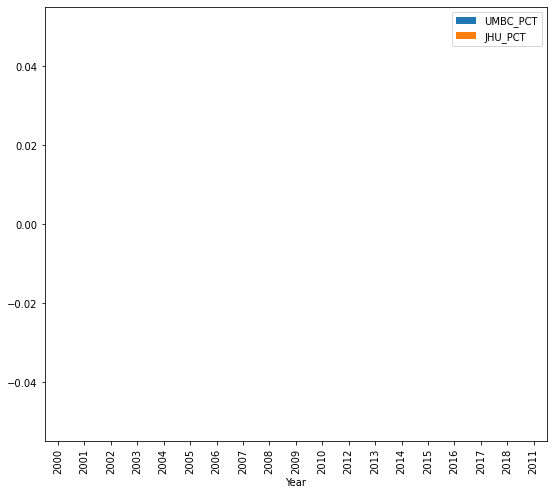

In [290]:
# trying matplotlib instead

# troubleshooting says it may not be an integer
# but I changed all columns to integer.
# also simple version works

df_merge3.plot(x="Year", y=["UMBC_PCT","JHU_PCT"], kind="bar",figsize=(9,8))
plt.show()


### Step 25: Plot them together using y=["UMBC_PCT","JHU_PCT"] option of line plot

### Step 26: Document your observation/conclusion of the comparison plots 

Based on my observation of the plots
